In [1]:
import os
import warnings
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [10]:
import numpy as np
from PIL import Image

In [15]:
# 数据所在文件夹
base_dir = './imgs'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [12]:
tmp_dirs = os.listdir(train_dir + '/outdoor')

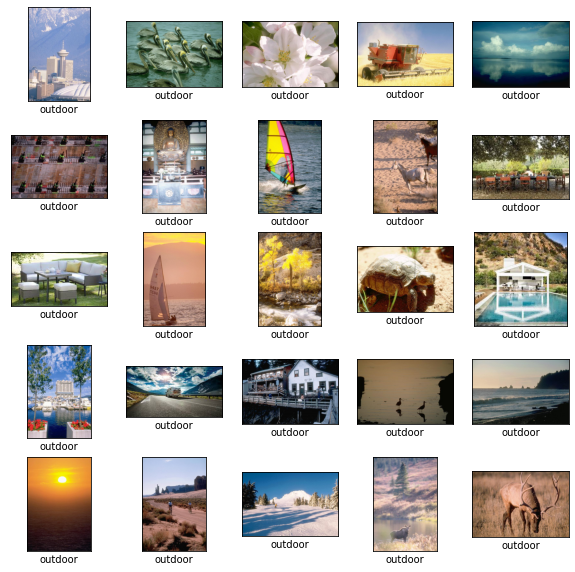

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(Image.open(train_dir + '/outdoor/' + tmp_dirs[i])))
    plt.xlabel('outdoor')
plt.show()

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 198, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 99, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 97, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 36, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 36, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 110592)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 150),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 150),
        batch_size=10,
        class_mode='binary')

Found 900 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


In [35]:
history = model.fit_generator(
      train_generator,
#     batch_size * steps_per_epoch
      steps_per_epoch=90,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=7,
      verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 90 steps, validate for 7 steps
Epoch 1/20
90/90 - 35s - loss: 0.6089 - acc: 0.6800 - val_loss: 0.5114 - val_acc: 0.7571
Epoch 2/20
90/90 - 33s - loss: 0.4456 - acc: 0.7867 - val_loss: 0.5004 - val_acc: 0.6714
Epoch 3/20
90/90 - 34s - loss: 0.3688 - acc: 0.8311 - val_loss: 0.5052 - val_acc: 0.7143
Epoch 4/20
90/90 - 34s - loss: 0.3004 - acc: 0.8911 - val_loss: 0.5468 - val_acc: 0.7857
Epoch 5/20
90/90 - 34s - loss: 0.2436 - acc: 0.9044 - val_loss: 0.4127 - val_acc: 0.7571
Epoch 6/20
90/90 - 34s - loss: 0.1915 - acc: 0.9422 - val_loss: 0.4180 - val_acc: 0.7571
Epoch 7/20
90/90 - 34s - loss: 0.1553 - acc: 0.9578 - val_loss: 0.4694 - val_acc: 0.7857
Epoch 8/20
90/90 - 34s - loss: 0.1126 - acc: 0.9722 - val_loss: 0.4110 - val_acc: 0.7429
Epoch 9/20
90/90 - 34s - loss: 0.0895 - acc: 0.9767 - val_loss: 0.4600 - val_acc: 0.8000
Epoch 10/20
90/90 - 34s - loss: 0.0741 - acc: 0.9856 - val_loss: 0.6506 - val_acc: 0.7714
Epoch 11/20
90/90 

In [10]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [37]:
model.save('saved_model/09_13_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/09_13_model/assets


In [19]:
tmp = model.predict(validation_generator)

In [21]:
tmp

array([[8.3951461e-01],
       [5.2582612e-04],
       [4.7081417e-07],
       [1.0000000e+00],
       [9.4936812e-01],
       [9.9999964e-01],
       [6.9158159e-05],
       [1.2630251e-03],
       [9.9994802e-01],
       [9.9999905e-01],
       [9.9999785e-01],
       [9.3358383e-03],
       [9.9943727e-01],
       [1.4055284e-09],
       [9.9999011e-01],
       [7.1448314e-01],
       [9.9831152e-01],
       [1.6365528e-05],
       [9.9988043e-01],
       [1.1785021e-02],
       [1.5737143e-05],
       [6.9047436e-03],
       [2.1294960e-01],
       [3.1958643e-07],
       [9.9955052e-01],
       [5.2103815e-03],
       [2.4620933e-05],
       [9.9757713e-01],
       [1.0000000e+00],
       [2.3847807e-02],
       [3.8541692e-01],
       [3.9445622e-06],
       [7.4959648e-01],
       [5.3142589e-03],
       [1.6828197e-01],
       [4.0808268e-02],
       [9.9559599e-01],
       [9.9954045e-01],
       [9.8740476e-01],
       [9.2756271e-01]], dtype=float32)

In [23]:
tmp.shape

(40, 1)

In [38]:
tmp[20]

array([1.5737143e-05], dtype=float32)

In [40]:
validation_dir

'./imgs/validation'

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

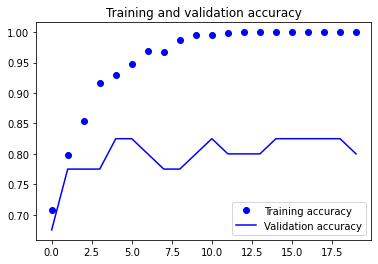

In [49]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

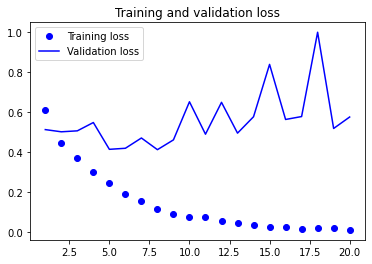

In [22]:
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
model.evaluate(validation_generator)

  ...
    to  
  ['...']
8/8 [==============================] - 1s 65ms/step - loss: 0.5029 - acc: 0.7778


[0.5029267896898091, 0.7777778]